In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Практика 9: Кластерний  аналіз

In [ ]:
install.packages("mvtnorm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("mclust")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)
library(dplyr)
library(mvtnorm)
library(mclust)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Package 'mclust' version 6.1
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:mvtnorm’:

    dmvnorm




In [ ]:
library(stats)

In [ ]:
options(repr.plot.width=4, repr.plot.height=4)

### **Приклад 1.**

Завантажимо  таблицю, в якій вказані дані по злочинності у містах (див. Таблиця~15.13 Rencher).

In [ ]:
city<-read.table("/content/drive/MyDrive/RScripts/T14_1_CITYCRIME.dat")
city

V1,V2,V3,V4,V5,V6,V7,V8
<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
Atlanta,16.5,24.8,106,147,1112,905,494
Boston,4.2,13.3,122,90,982,669,954
Chicago,11.6,24.7,340,242,808,609,645
Dallas,18.1,34.2,184,293,1668,901,602
Denver,6.9,41.5,173,191,1534,1368,780
Detroit,13.0,35.7,477,220,1566,1183,788
Hartford,2.5,8.8,68,103,1017,724,468
Honolulu,3.6,12.7,42,28,1457,1102,637
Houston,16.8,26.6,289,186,1509,787,697


## 1. **Ієархічна кластерізація.**

Для виконання ієархічної кластерізації використаємо функцію hclust; за замовченням, використовується евклідова відстань.

In [ ]:
hc<- hclust(dist(city[,2:8]))
hc


Call:
hclust(d = dist(city[, 2:8]))

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 16 


In [ ]:
attributes(hc)

$names
[1] "merge"       "height"      "order"       "labels"      "method"     
[6] "call"        "dist.method"

$class
[1] "hclust"

Якщо потрібно змініти відстань, треба задати інший параметр в method, наприклад, method="manhattan":
$$
d(x,y) := \sum_{j=1}^n |x_i-y_j|.
$$
Зауважимо, що ми спочатку застосовуємо функцію до матриці city[,2:8], тому  відстані треба  змінити  всередіни функції
dist.
Щоб вибрати інший тип кластерізхації, треба змінити параметр method в функції hclus.

In [ ]:
hc1 <- hclust(dist(city[,2:8], method  ="manhattan"), method = "single")
hc1


Call:
hclust(d = dist(city[, 2:8], method = "manhattan"), method = "single")

Cluster method   : single 
Distance         : manhattan 
Number of objects: 16 


У даному випадку всі ці методи дають однакові результати.
Намалюємо дендрограму:

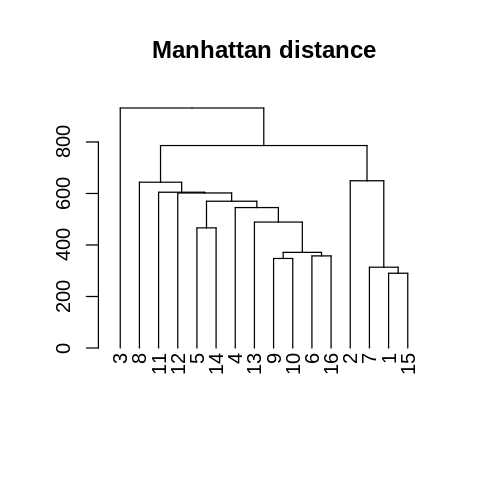

In [ ]:
hcd1 <- as.dendrogram(hc1)
plot(hcd1, main = "Manhattan distance")

In [ ]:
hc2 <- hclust(dist(city[,2:8], method  ="manhattan"), method = "complete")
hc2


Call:
hclust(d = dist(city[, 2:8], method = "manhattan"), method = "complete")

Cluster method   : complete 
Distance         : manhattan 
Number of objects: 16 


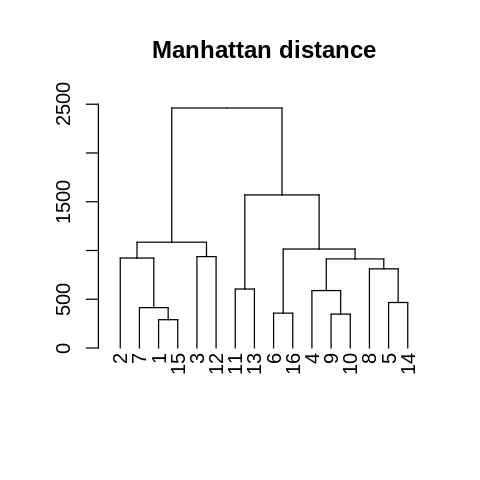

In [ ]:
hcd2 <- as.dendrogram(hc2)
plot(hcd2, main = "Manhattan distance")

## 2. **kmeans**

Застосуємо тепер метод $к$ середніх.

In [ ]:
?kmeans

In [ ]:
kmeans.city<-kmeans(city[,2:8], 4, iter.max = 10, nstart = 1)
kmeans.city

K-means clustering with 4 clusters of sizes 2, 5, 3, 6

Cluster means:
         V2       V3    V4       V5       V6        V7    V8
1 12.750000 31.65000 500.5 218.5000 1531.000 1093.0000 763.5
2 10.860000 27.94000 185.4 175.4000 1531.600 1005.2000 637.8
3  8.666667 37.56667 327.0 271.0000 1703.333 1382.0000 830.0
4  8.366667 22.36667 164.5 168.8333 1030.167  783.1667 636.5

Clustering vector:
 [1] 4 4 4 2 3 1 4 2 2 2 3 4 3 2 4 1

Within cluster sum of squares by cluster:
[1]  20992.43 292798.46 150609.48 501946.65
 (between_SS / total_SS =  70.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Вибір параметру $nstarts$ більшим  за 1 означає, що буде взято декілька конфігурацій, і в результаті повертається та, де сума квадратів відстаней всередині кластерів найменша.

Подивитися атрібути kmeans можна  [тут.](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/kmeans)

Розподіл по кластерам:

In [ ]:
kmeans.city$cluster

[1] 4 4 4 2 3 1 4 2 2 2 3 4 3 2 4 1

Те саме, але іншим способом:

In [ ]:
kmeans.city[1]

$cluster
 [1] 4 4 4 2 3 1 4 2 2 2 3 4 3 2 4 1

In [ ]:
kmeans.city[2]


,V2,V3,V4,V5,V6,V7,V8
1,12.750000,31.65000,500.5,218.5000,1531.000,1093.0000,763.5
2,10.860000,27.94000,185.4,175.4000,1531.600,1005.2000,637.8
3,8.666667,37.56667,327.0,271.0000,1703.333,1382.0000,830.0
4,8.366667,22.36667,164.5,168.8333,1030.167,783.1667,636.5


In [ ]:
kmeans.city2<-kmeans(city[,2:8], 2, iter.max = 10, nstart = 1)
kmeans.city2

K-means clustering with 2 clusters of sizes 6, 10

Cluster means:
         V2       V3    V4       V5       V6        V7    V8
1  8.366667 22.36667 164.5 168.8333 1030.167  783.1667 636.5
2 10.580000 31.57000 290.9 212.7000 1583.000 1135.8000 720.6

Clustering vector:
 [1] 1 1 1 2 2 2 1 2 2 2 2 1 2 2 1 2

Within cluster sum of squares by cluster:
[1]  501946.6 1035952.6
 (between_SS / total_SS =  52.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

### **Приклад 2.**

Розглянемо метод сумішей. Ми зробимо кластерізацію використовуючи пакет mclust. Ми згенеруємо гаусівську суміш і розіб'ємо вибірку по 3м кластерам.

Ще приклади для пакету mclust: https://cran.r-project.org/web/packages/mclust/vignettes/mclust.html та  https://cran.r-project.org/web/packages/mclust/index.html

In [46]:
m_1 <- c(1,1)
m_2 <- c(-2,4)
m_3 <- c(5,5)
sig_1<- matrix(c(1, -.5, -.5, 1), nrow =2, byrow= FALSE)
sig_2<- matrix(c(2, -.5, -.5, 2), nrow =2, byrow= FALSE)
sig_3<- matrix(c(1, 0, 0, 1), nrow =2, byrow= FALSE)
mv_1<-rmvnorm(30, m_1, sig_1)
mv_2<-rmvnorm(20, m_2, sig_2)
mv_3<-rmvnorm(50, m_3, sig_3)

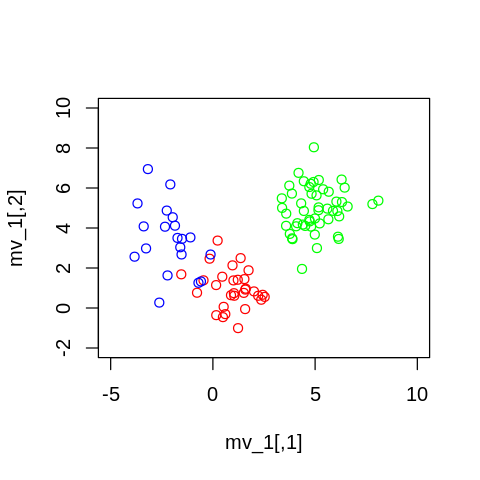

In [47]:
plot(mv_1, col = "red", xlim=c(-5,10), ylim=c(-2,10))
points(mv_2, col= "blue")
points(mv_3, col= "green")

In [48]:
X <- rbind(mv_1,mv_2,mv_3)

Застосовуємо функцію Mclust до наших даних:

In [49]:
data_1 = Mclust(X, G = 3)
data_1

'Mclust' model object: (EII,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

In [50]:
summary(data_1, parameters = TRUE)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EII (spherical, equal volume) model with 3 components: 

 log-likelihood   n df       BIC       ICL
      -396.3279 100  9 -834.1024 -838.5183

Clustering table:
 1  2  3 
34 16 50 

Mixing probabilities:
        1         2         3 
0.3324376 0.1686663 0.4988961 

Means:
          [,1]      [,2]     [,3]
[1,] 0.7967889 -2.254055 5.032885
[2,] 0.9929202  3.845725 4.948537

Variances:
[,,1]
         [,1]     [,2]
[1,] 1.176546 0.000000
[2,] 0.000000 1.176546
[,,2]
         [,1]     [,2]
[1,] 1.176546 0.000000
[2,] 0.000000 1.176546
[,,3]
         [,1]     [,2]
[1,] 1.176546 0.000000
[2,] 0.000000 1.176546

Код EM (Expectation-Maximization) алгоритму можна почитати тут:

https://rstudio-pubs-static.s3.amazonaws.com/154174_78c021bc71ab42f8add0b2966938a3b8.html

Тут BIC (Bayesian Information Criterion)
$$
BIC= - 2 \ln L(X,\theta) + k \ln n,
$$
де $L(X,\theta)$ - функція вирогідностей,  $n$ - кількість спостережень, $k$ - кількість незалежних параметрів.  
(див. https://sites.stat.washington.edu/raftery/Research/PDF/fraley1998.pdf

та

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5096736/

Можна застосовувати інший критерій для максимізації (Акаіке критерій), який теж враховує кількість класів
$$
AIC = 2 (k- \ln L(X,\theta))
$$
де $k$ -- кількість невідомих параметрів.

У нас кількість незалежних параметрів 9,  $ln L(X,\theta)  =-381.5052$. Пакет mclust бере цю величину зі знаком +, тому

In [ ]:
2*381.5052 +9 * log(100)

[1] 804.4569

In [ ]:
table(data_1$classification)


 1  2  3 
35 15 50 

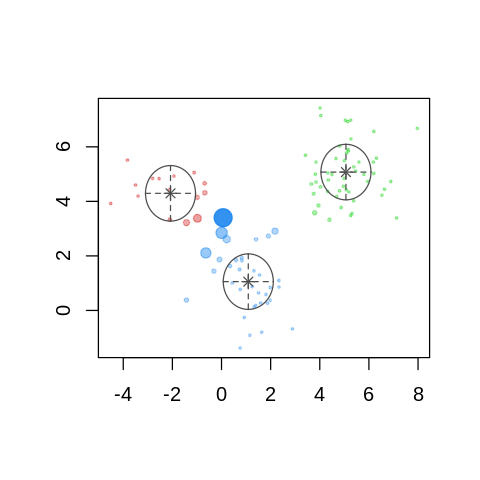

In [ ]:
plot(data_1, what = "uncertainty")


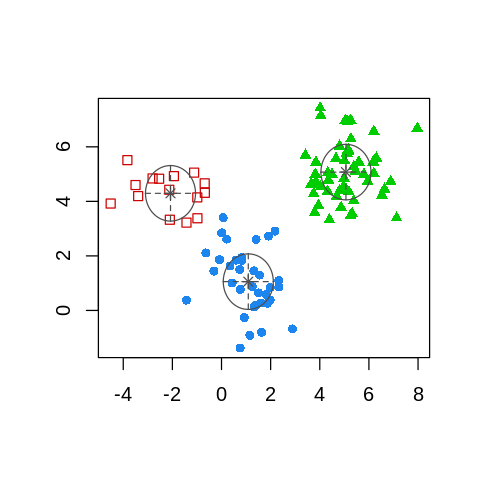

In [ ]:
plot(data_1, what = "classification")


Як подивитися аттрібути:

In [ ]:
attributes(data_1)

$names
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

$class
[1] "Mclust"

Тоді можнв виділити, наприклад, класс, до якого віднесли те чи інше спостереження, і подивитися, наскільки таке розбиття на кластери адекватне:

In [ ]:
cl = data_1$classification
cl

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1
 [38] 2 1 2 2 2 2 2 2 1 2 2 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

Згрупуємо в 1 таблицю і зробимо матрицю невідповідностей.

1. Створимо вектор классів:

In [ ]:
num = c(rep(1,30), rep(2,20), rep(3,50))

2. Перетворимо  дані у наступному вигляді:

In [ ]:
Dat_old = data.frame(cbind(num,X))
head(Dat_old)

,num,V2,V3
,<dbl>,<dbl>,<dbl>
1,1,0.3451650,1.6282419
2,1,1.5098874,0.6452546
3,1,0.8261826,1.9378878
4,1,1.3871016,0.1833049
5,1,2.1777250,2.9053170
6,1,0.5897606,1.8465603


3. Дані після класифікації:

In [ ]:
Dat_new = data.frame(cbind(cl,X))
head(Dat_new)

,cl,V2,V3
,<dbl>,<dbl>,<dbl>
1,1,0.3451650,1.6282419
2,1,1.5098874,0.6452546
3,1,0.8261826,1.9378878
4,1,1.3871016,0.1833049
5,1,2.1777250,2.9053170
6,1,0.5897606,1.8465603


In [ ]:
cm2 <- table(Dat_old$num, Dat_new$cl)
cm2

   
     1  2  3
  1 30  0  0
  2  5 15  0
  3  0  0 50

Отже, ми майже все класифікували правильно!

###  Приклад 3

Розглянемо тепер метод DBSCAN. Для цього нам потрібен пакет factoextra (установка пакету займає хв.5-10)

In [ ]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘later’, ‘lazyeval’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘httpuv’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [51]:
library(factoextra)

Розглянемо дані, які пропонуються в цьому пакеті, та  зробимо класифікацію методом DBSCAN.

In [52]:
data("multishapes", package = "factoextra")
df <- multishapes[, 1:2]

Спочатку зробимо кластерізацію методом k-means.

Warning message:
“argument frame is deprecated; please use ellipse instead.”


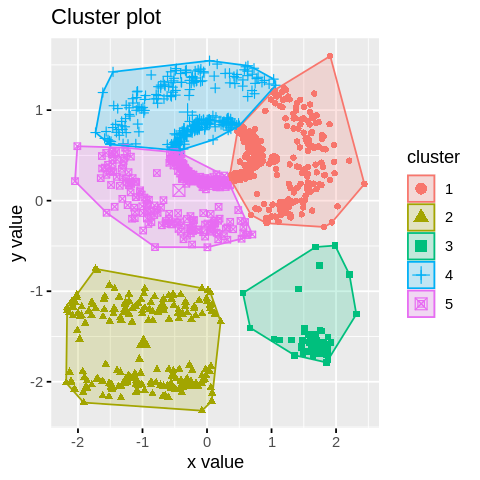

In [54]:
set.seed(123)
km.res <- kmeans(df, 5, nstart = 25)
fviz_cluster(km.res, df, frame = TRUE, geom = "point")

Як ми бачимо, розбиття на кластери не таке, як нам би хотілось. Встановимо тепер пакети, які містять  функцію dbscan.  Ця функція міститья і в пакеті fpc, і в пакеті dbscan, тому ми будемо вказувати, який саме пакет використовується.

dbscan(data, eps, MinPts = 5, scale = FALSE,
   method = c("hybrid", "raw", "dist"))

Тут data -- це матриця або data frame або так звана  матриця відстаней (dissimilarity matrix), тобто дані формату *.dist.  Останньому випадку треба обирати   method = ``dist'',  оскільки ми будемо працювати з матрицею відстаней; інакше буде використана евклідова відстань.  Метод raw означає, що ми не оброблюємо наші дані, а в гібрідному методі  ми працюємо з  необробленими даними, але обчислюємо матрицю відстаней.

In [55]:
install.packages("fpc")
install.packages("dbscan")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("fpc")
library("dbscan")


Attaching package: ‘dbscan’


The following object is masked from ‘package:fpc’:

    dbscan


The following object is masked from ‘package:stats’:

    as.dendrogram




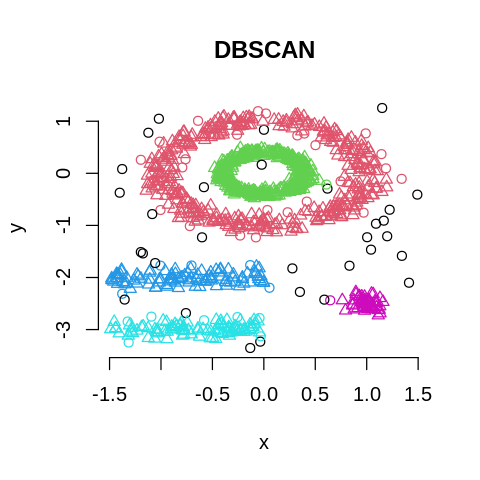

In [ ]:
set.seed(123)
res.fpc <- fpc::dbscan(df, eps = 0.15, MinPts = 5)
# Plot DBSCAN results
plot(res.fpc, df, main = "DBSCAN", frame = FALSE)

Функція  plot.dbscan() використовує різні типи  точок (трикутники та кружочки) для основних точок та для граничних. Чорний колір відповідає викидам.

Можна вивести інформацію про те, як кластерізовані точки за допомогою  fpc::dbscan():

Warning message in dbscan::dbscan(df, eps = 0.15, MinPts = 5):
“converting argument MinPts (fpc) to minPts (dbscan)!”


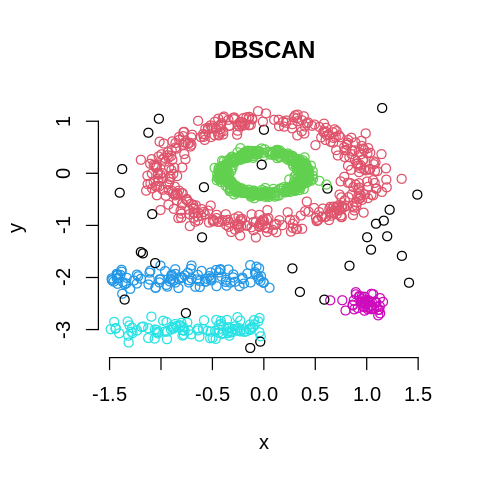

In [ ]:
set.seed(123)
res.db <- dbscan::dbscan(df, eps = 0.15, MinPts = 5)
# Plot DBSCAN results
plot(res.db, df, main = "DBSCAN", frame = FALSE)

Інший спосіб:

Warning message:
“argument frame is deprecated; please use ellipse instead.”


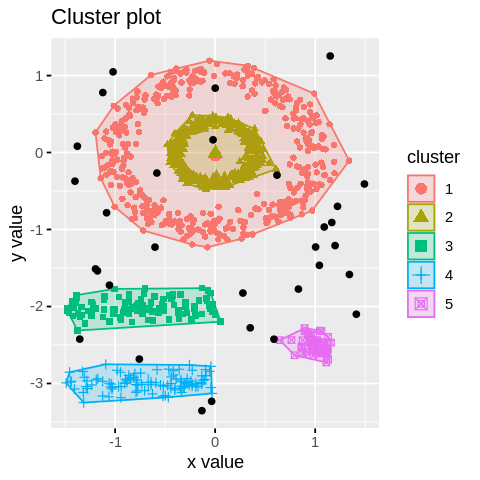

In [ ]:
fviz_cluster(res.fpc, df, stand = FALSE, frame = FALSE, geom = "point")

Можна зробити аналіз обома методами, та перевірити, що результати співпадають:

In [ ]:
print(res.fpc)

dbscan Pts=1100 MinPts=5 eps=0.15
        0   1   2   3  4  5
border 31  24   1   5  7  1
seed    0 386 404  99 92 50
total  31 410 405 104 99 51


In [ ]:
print(res.db)

DBSCAN clustering for 1100 objects.
Parameters: eps = 0.15, minPts = 5
Using euclidean distances and borderpoints = TRUE
The clustering contains 5 cluster(s) and 31 noise points.

  0   1   2   3   4   5 
 31 410 405 104  99  51 

Available fields: cluster, eps, minPts, dist, borderPoints


Можна застосувати метод $k$  найближчих сусідів, а саме: обчислити середню відстань будь-якої точки до її $k$  найближчих сусідів. Значення  $k$ визначається самим користувачем. Далі,  будується графік цих відстаней у зростаючому напрямку, див. Рис.~\ref{fig12-8}. Як і в методі головних компонент, ми визначаємо те значення $\epsilon$, на якому графік має ``злам''. Цей злам означає той момент, де відбувається різка зміна в відстанях  до $k$ найближчих сусідів ($k$-distance), при яких відбувається кластерізація.

Використаємо функції  kNNdistplot() (в пакеті \textbf{dbscan})  для побудови такого графіку залежності $k$-distance від  $\epsilon$:

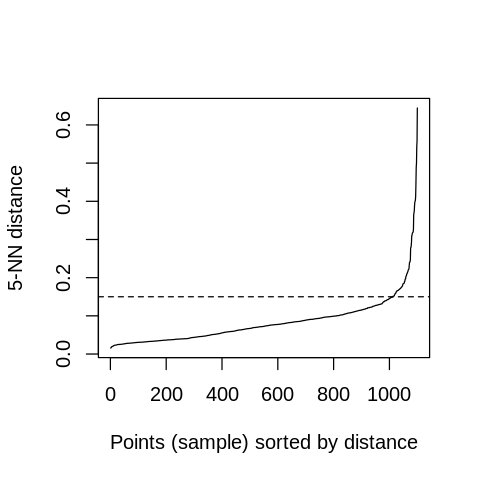

In [ ]:
dbscan::kNNdistplot(df, k =  5)
abline(h = 0.15, lty = 2)

Тут при значенні  $\epsilon = .15$ відбувається злам, тому будемо вважати, що оптимальне значення $\epsilon$ дорівнює 0.15.

Можна подивитись розподіл по кластерам:

In [ ]:
# Cluster membership. Noise/outlier observations are coded as 0
# A random subset is shown
res.fpc$cluster[sample(1:1089, 50)]

[1] 2 2 1 2 1 4 1 2 2 2 0 4 1 1 3 1 2 1 4 2 2 1 3 2 2 4 4 0 4 4 1 1 1 2 1 2 1 2
[39] 3 1 1 1 1 2 1 1 2 2 2 2

Зробимо тепер прогноз перших 10 елементів, маючи результати кластерізації 11-111 елементу:

In [ ]:
df2<- multishapes[1:10, 1:2]
df2

,x,y
,<dbl>,<dbl>
1,-0.8037393,-0.85305261
2,0.8528507,0.36761844
3,0.9271795,-0.27490244
4,-0.7526261,-0.51156517
5,0.7068462,0.81067920
6,1.0346985,0.39465502
7,-0.4758452,0.98976081
8,-0.4603016,-0.85899779
9,-0.6803015,-0.66149481


In [ ]:
df1<- multishapes[11:111, 1:2]
df2<- multishapes[1:10, 1:2]
res2.fpc <- fpc::dbscan(df1, eps = 0.15, MinPts = 5)

In [ ]:
predict.dbscan(res2.fpc,df1,df2)

[1] 0 0 0 0 0 0 3 1 0 5